In [694]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [695]:
def compute_mse(y, tx, w, fct='mse'):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    if(len(y.shape)==1):
        y=y.reshape(len(y),1);
    e = y-tx.dot(w);
    print(e.shape);
    if fct=='mse':
        return 1./(2.*y.shape[0])*e.T@e
    elif fct=='mae':
        return 1./(2*y.shape[0])*np.sum(np.abs(e))
    else:
        raise NotImplementedError

In [696]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    
    w_opt=(np.linalg.inv((tx.T.dot(tx))).dot(tx.T)).dot(y);
    if(len(w_opt.shape)==1):
        w_opt=w_opt.reshape(len(w_opt),1);
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    return w_opt

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [697]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w_opt=least_squares(y, tx)
    return w_opt
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************


Test it here

In [698]:
w_opt=test_your_least_squares()
print(w_opt);

[[ 73.293922  ]
 [ 13.47971243]]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [699]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

x


shape of x (50,)
shape of y (50,)


array([ 0.35237491,  4.8951233 ,  1.86662437,  3.50706129,  3.38087384,
        0.73093728,  3.88562366,  5.65224803,  6.28318531,  2.37137419,
        0.60474982,  3.63324875,  0.85712473,  2.49756165,  1.61424946,
        5.39987312,  6.15699785,  6.0308104 ,  0.47856237,  2.87612401,
        4.51656093,  0.98331219,  1.10949964,  0.1       ,  2.11899928,
        1.36187455,  4.01181111,  5.77843549,  4.26418602,  1.2356871 ,
        2.24518674,  1.99281183,  1.48806201,  4.64274839,  4.39037348,
        3.00231147,  0.22618746,  5.27368567,  5.02131076,  5.52606058,
        2.6237491 ,  4.76893584,  3.12849893,  1.74043692,  3.7594362 ,
        3.25468638,  5.90462294,  4.13799857,  2.74993656,  5.14749821])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [704]:
def compute_rmse(y,weights,phi_tilde):
    ''' e=y.reshape((len(y),1))-phi_tilde.dot(weights); 
        MSE=((e.T).dot(e))/(2*len(y));'''
    MSE=compute_mse(y,phi_tilde,weights);
    rmse=np.sqrt(2*MSE);
    return rmse

In [705]:
g=[1,2,3];
build_poly(g, 11)

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01,   3.20000000e+01,
          6.40000000e+01,   1.28000000e+02,   2.56000000e+02,
          5.12000000e+02,   1.02400000e+03,   2.04800000e+03],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01,   2.43000000e+02,
          7.29000000e+02,   2.18700000e+03,   6.56100000e+03,
          1.96830000e+04,   5.90490000e+04,   1.77147000e+05]])

In [706]:
from plots import *
def polynomial_regression(x):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 15]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    
    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        phi_tilde=build_poly(x, degree);
        weights=least_squares(y, phi_tilde);
            
            
        
        # ***************************************************
          
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        rmse=compute_rmse(y,weights,phi_tilde);
        # ***************************************************
        

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
            i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

(50, 1)
Processing 1th experiment, degree=1, rmse=[[ 0.47187608]]
(50, 1)
Processing 2th experiment, degree=3, rmse=[[ 0.25858278]]
(50, 1)
Processing 3th experiment, degree=7, rmse=[[ 0.2496587]]
(50, 1)
Processing 4th experiment, degree=15, rmse=[[ 1.2708949]]


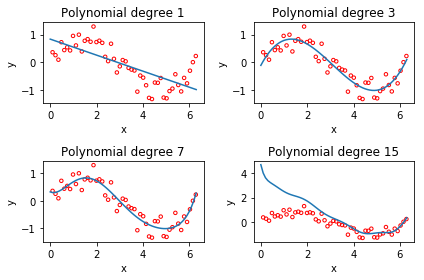

In [707]:
polynomial_regression(x)

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [708]:
def split_random_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    if(len(y.shape)==1):
        y=y.reshape(len(y),1);
    if(len(x.shape)==1):
        x=x.reshape(len(x),1);
    y_1=np.copy(y);
    x_1=np.copy(x);
    i=0;
   
    y_new_dim=list(y.shape);
    x_new_dim=list(x.shape); 
    
    train_dim=np.int(x_new_dim[0]*ratio);
    val_dim=x_new_dim[0]-train_dim;
   
    y_new_dim[0]=train_dim;
    x_new_dim[0]=train_dim;
    y_train=np.ndarray(y_new_dim);
    x_train=np.ndarray(x_new_dim);
    
    y_new_dim[0]=val_dim;
    x_new_dim[0]=val_dim;
    y_val=np.ndarray(x_new_dim);
    x_val=np.ndarray(x_new_dim);
  
    
    while i<train_dim:
        rand=int(np.random.rand(1,1)*len(y));
        
        if y_1[rand]!=0:
            y_train[i,:]=y_1[rand,:];
            x_train[i,:]=x_1[rand,:];
            y_1[rand]=0;
            i=i+1;
        
            
    cont=0;
    i=1;
    for i in range(1,len(y)):
        if y_1[i]!=0:
            y_val[cont,:]=y[i,:];
            x_val[cont,:]=x[i,:];
            cont=cont+1;
            
        
        
    
    return y_train,x_train,y_val,x_val
    
    
     
    
    # ***************************************************

In [709]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    if(len(y.shape)==1):
        y=y.reshape(len(y),1);
    if(len(x.shape)==1):
        x=x.reshape(len(x),1);
    y_1=np.copy(y);
    x_1=np.copy(x);
    i=0;
   
    y_new_dim=list(y.shape);
    x_new_dim=list(x.shape); 
    
    train_dim=np.int(x_new_dim[0]*ratio);
    val_dim=x_new_dim[0]-train_dim;
   
    y_new_dim[0]=train_dim;
    x_new_dim[0]=train_dim;
    y_train=np.ndarray(y_new_dim);
    x_train=np.ndarray(x_new_dim);
    
    y_new_dim[0]=val_dim;
    x_new_dim[0]=val_dim;
    y_val=np.ndarray(x_new_dim);
    x_val=np.ndarray(x_new_dim);
  
    i=0;
    while i<train_dim:
            y_train[i,:]=y_1[i,:];
            x_train[i,:]=x_1[i,:];
            i=i+1;   
    cont=0;
    while i<x.shape[0]:       
            y_val[cont,:]=y[i,:];
            x_val[cont,:]=x[i,:];
            cont=cont+1;
            i=i+1;
            
        
        
    
    return y_train,x_train,y_val,x_val
    
    
     
    
    # ***************************************************

In [710]:
y_2=np.array((1,2,3,4,5,10,11,12));
x_2=np.array((1,2,3,4,5,10,11,12));
[y_train,x_train,y_val,x_val]=split_data(y_2,x_2,0.2,6);
print(y_train)
print(x_train)
print(y_val)
print(x_val)

[[ 1.]]
[[ 1.]]
[[  2.]
 [  3.]
 [  4.]
 [  5.]
 [ 10.]
 [ 11.]
 [ 12.]]
[[  2.]
 [  3.]
 [  4.]
 [  5.]
 [ 10.]
 [ 11.]
 [ 12.]]


In [711]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    [y_train,x_train,y_val,x_val]=split_random_data(x, y, ratio, seed);
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    
    # form train and test data with polynomial basis function: TODO
    phi_tilde_train=build_poly(x_train, degree); 
    if x_val.shape[0]!=0 :
        phi_tilde_val=build_poly(x_val, degree); 
    
    # *************************************************** 
     
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    
    
    weights_train=least_squares(y_train, phi_tilde_train);

    
    
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    
    rmse_tr=np.asscalar(compute_rmse(y_train,weights_train,phi_tilde_train));
    if x_val.shape[0]!=0 :
        rmse_te=np.asscalar(compute_rmse(y_val,weights_train,phi_tilde_val));
    else:
        rmse_te=1;
    
    
    # ***************************************************
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
      p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

In [712]:
seed = 6
degrees = [1, 3, 7, 10]
split_ratios = [1, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:

        train_test_split_demo(x, y, degree, split_ratio, seed);

(50, 1)
proportion=1, degree=1, Training RMSE=0.472, Testing RMSE=1.000
(50, 1)
proportion=1, degree=3, Training RMSE=0.259, Testing RMSE=1.000
(50, 1)
proportion=1, degree=7, Training RMSE=0.250, Testing RMSE=1.000
(50, 1)
proportion=1, degree=10, Training RMSE=0.248, Testing RMSE=1.000
(25, 1)
(25, 1)
proportion=0.5, degree=1, Training RMSE=0.474, Testing RMSE=0.523
(25, 1)
(25, 1)
proportion=0.5, degree=3, Training RMSE=0.264, Testing RMSE=1.630
(25, 1)
(25, 1)
proportion=0.5, degree=7, Training RMSE=0.228, Testing RMSE=2.874
(25, 1)
(25, 1)
proportion=0.5, degree=10, Training RMSE=0.216, Testing RMSE=40.721
(5, 1)
(45, 1)
proportion=0.1, degree=1, Training RMSE=0.679, Testing RMSE=0.819
(5, 1)
(45, 1)
proportion=0.1, degree=3, Training RMSE=0.360, Testing RMSE=0.322
(5, 1)
(45, 1)
proportion=0.1, degree=7, Training RMSE=5.406, Testing RMSE=11.282
(5, 1)
(45, 1)
proportion=0.1, degree=10, Training RMSE=0.122, Testing RMSE=0.767


# 3 Ridge Regression
Please fill in the function below.

In [713]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    A=tx.T.dot(tx);
    lambda_=lambda_*(2*y.shape[0]);
    w_opt=(np.linalg.inv(A+lambda_*np.identity(A.shape[0])).dot(tx.T)).dot(y); 
    
    if(len(w_opt.shape)==1):
        w_opt=w_opt.reshape(len(w_opt),1);
    return w_opt;
    # ridge regression: TODO
    # ***************************************************


In [717]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    [y_train,x_train,y_val,x_val]=split_data(x, y, ratio, seed);
    print(x_train.shape);
    print(x_val.shape);
# ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    phi_tilde_train=build_poly(x_train, degree); 
    phi_tilde_val=build_poly(x_val, degree); 
    # ***************************************************
    rmse_tr = np.zeros(len(lambdas));
    rmse_te = np.zeros(len(lambdas));
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        weights_train=ridge_regression(y_train,phi_tilde_train , lambda_);
    
        rmse_tr[ind]=np.asscalar(compute_rmse(y_train,weights_train,phi_tilde_train));
        rmse_te[ind]=np.asscalar(compute_rmse(y_val,weights_train,phi_tilde_val));
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

  


(25, 1)
(25, 1)
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.233, Testing RMSE=0.303
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.235, Testing RMSE=0.296
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.238, Testing RMSE=0.288
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.242, Testing RMSE=0.282
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.245, Testing RMSE=0.279
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.247, Testing RMSE=0.277
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.248, Testing RMSE=0.275
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.249, Testing RMSE=0.274
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.250, Testing RMSE=0.272
(25, 1)
(25, 1)
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.251, Testing RMSE=0.269
(25, 1)
(25, 1)
proporti

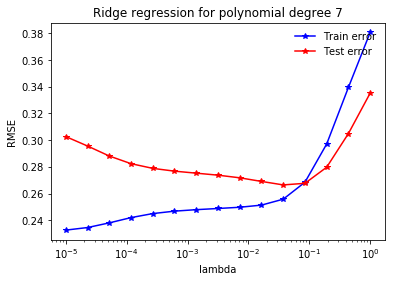

In [718]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)